<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Collect_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import itertools 

In [32]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Mounted at /content/gdrive


In [ ]:
consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"
access_token="799815406462652416-V4f33Mp2G81GeSLeWVHQgGtp2djIuyK"
access_token_secret="UH4iGaQhmNiKVeo2scTmgZneTQuRDR10SSoyivGS0qU0K"


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.user_timeline(screen_name = screen_name,count=200, lang = "en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest, lang = "en")
    #just if lan tweetes 
    # save most recent tweets
    
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets_en.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [ ]:
get_all_tweets("Saudi_airlines")

In [17]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/Saudi_airlines_tweets.csv")

In [18]:
saudia_airlines.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
1526,1326757022818299909,2020-11-12 05:21:38,@Hamad_Alkuraya https://t.co/l6rvOGSIr1,2,False,Saudi Arabia,und,Saudi_airlines
2881,1321019063318073344,2020-10-27 09:21:02,"@Satish66015454 Dear guest, you can follow the flight schedule by visiting the Saudi website unt...",0,False,Saudi Arabia,en,Saudi_airlines
868,1330127332481388556,2020-11-21 12:34:03,@msm809 وعليكم السلام ضيفنا العزيز، ملاحظاتكم واقتراحاتكم القيمة هي محل اهتمامنا وتقديرنا، كما ي...,0,False,Saudi Arabia,ar,Saudi_airlines
2378,1322756496669790211,2020-11-01 04:24:59,@Gemini_kl ضيفنا العزيز، تم الرد عبر الخاص . شكراً لتواصلك,0,False,Saudi Arabia,ar,Saudi_airlines
2350,1322882929652092929,2020-11-01 12:47:23,@hadi54416 ضيفنا العزيز، يرجى ايضاح طلبك لنتمكن من خدمتك. شكراً لتواصلك,0,False,Saudi Arabia,ar,Saudi_airlines
1529,1326755572297986048,2020-11-12 05:15:53,"@SalimGahlot_ Hello our valued guest, For more information regarding your inquire kindly visit h...",1,False,Saudi Arabia,en,Saudi_airlines
1593,1326257163002634240,2020-11-10 20:15:22,"@fayzasafar ضيفنا العزيز، نأمل منك الاستفسار عبر ""المديرية العامة للجوازات السعودية"" عبر موقعهم ...",0,False,Saudi Arabia,ar,Saudi_airlines
2694,1321568104980353024,2020-10-28 21:42:44,@tilloi أهلاً ضيفنا العزيز، لخدمتك يرجى التواصل مع قسم الشحن الجوي عبر زيارة الرابط التاليhttps:...,0,False,Saudi Arabia,ar,Saudi_airlines
2898,1320948231552061440,2020-10-27 04:39:35,"@harish28737 Dear guest, Kindly clarify your inquiry to assist you. Thank you",0,False,Saudi Arabia,en,Saudi_airlines
706,1330974868670705666,2020-11-23 20:41:51,@AC04x عليكم السلام ضيفنا العزيز، يرجى تزويدنا برقم التذكرة الإلكترونية والتي تبدأ بـ065 عبر الخ...,0,False,Saudi Arabia,ar,Saudi_airlines


In [ ]:
get_all_tweets("flynas")

getting tweets before 1333803986864857088
...400 tweets downloaded so far
getting tweets before 1331903679733977088
...600 tweets downloaded so far
getting tweets before 1330055167807549446
...800 tweets downloaded so far
getting tweets before 1328180460221059071
...1000 tweets downloaded so far
getting tweets before 1326192459039338495
...1200 tweets downloaded so far
getting tweets before 1324406303817609218
...1400 tweets downloaded so far
getting tweets before 1322929543569678335
...1600 tweets downloaded so far
getting tweets before 1321350527469367295
...1800 tweets downloaded so far
getting tweets before 1319797682727170049
...2000 tweets downloaded so far
getting tweets before 1318201592693329920
...2200 tweets downloaded so far
getting tweets before 1316789074557100033
...2400 tweets downloaded so far
getting tweets before 1315389871813464063
...2600 tweets downloaded so far
getting tweets before 1314166213241700353
...2800 tweets downloaded so far
getting tweets before 131273

In [ ]:
flynas_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/flynas_tweets.csv")

In [ ]:
flynas_airlines.sample(10)

,id,created_at,text,likes,in reply to,retweeted,location,language
2829,1312469651083853824,2020-10-03 19:08:43,"@Mehtab0000786 Hello dear, provide us with you...",0,Mehtab0000786,False,Saudi Arabia,en
719,1328838370856984577,2020-11-17 23:12:10,@A_F_Alanzi وعليكم السلام ، يرجى تزويدنا برقم ...,0,A_F_Alanzi,False,Saudi Arabia,ar
1862,1319281845918265347,2020-10-22 14:17:57,ايش الأغراض اللي ماتقدر تسافر بدونها ؟ 👀\n\n#ط...,14,NaN,False,Saudi Arabia,ar
1239,1324001912254091270,2020-11-04 14:53:49,@hatemamreet مرحبا، تم الرد في الخاص .,0,hatemamreet,False,Saudi Arabia,ar
2943,1311701994210549760,2020-10-01 16:18:20,@A_thobaiti وعليكم السلام، يسمح بحمله فقط داخل...,0,A_thobaiti,False,Saudi Arabia,ar
1768,1320018351800930306,2020-10-24 15:04:34,@ii_il15 حياك الله ، تم الرد من خلال الخاص . ش...,0,ii_il15,False,Saudi Arabia,ar
306,1332817897144594432,2020-11-28 22:45:23,@sale_b0b تم الرد عبر الخاص,0,sale_b0b,False,Saudi Arabia,ar
2387,1315536164716261377,2020-10-12 06:13:57,@Asamjh11123 حياك الله،تابعنا وسيتم الإعلان عن...,0,Asamjh11123,False,Saudi Arabia,ar
2785,1312782872001085443,2020-10-04 15:53:21,@kmell4411 مرحبا، تابعنا بإستمرار وسيتم الإعلا...,0,kmell4411,False,Saudi Arabia,ar
2650,1313770948017958914,2020-10-07 09:19:37,@MecFawzi حياك الله ،رحلاتنا من مطار الملك عبد...,0,MecFawzi,False,Saudi Arabia,ar


In [ ]:
len(saudia_airlines[saudia_airlines.language == "en"])

1464

In [ ]:
len(flynas_airlines[flynas_airlines.language == "en"])

219

In [19]:
saudia_airlines_en = saudia_airlines[saudia_airlines.language == "en"]

In [ ]:
saudia_airlines_en.head()

,tweet_id,created_at,text,likes,retweeted,location,language,airline
14,1335393841810202624,2020-12-06 01:21:16,"@Mohamme43723700 Dear guest, there is no flight from India to Saudi Arabia at this time. Kindly ...",1,False,Saudi Arabia,en,Saudi_airlines
23,1335337522738720770,2020-12-05 21:37:29,"@khalidwhd Hello dear guest, we hope you check and be informed of travel updates due to the Coro...",1,False,Saudi Arabia,en,Saudi_airlines
29,1335334320014315521,2020-12-05 21:24:45,"@JailanShair Hello dear guest, please provide us with the booking number through the direct mess...",0,False,Saudi Arabia,en,Saudi_airlines
38,1335322063851167748,2020-12-05 20:36:03,"@Shakeel60633858 Dear guest, there is no flight from India to Saudi Arabia at this time. When fl...",1,False,Saudi Arabia,en,Saudi_airlines
43,1335314759588122626,2020-12-05 20:07:02,"@AliAnsari079348 Hello dear guest, You can follow up the flights schedule in our website https:/...",1,False,Saudi Arabia,en,Saudi_airlines


In [ ]:
flynas_airlines_en = flynas_airlines[flynas_airlines.language == "en"]

In [ ]:
flynas_airlines_en.head()

,tweet_id,created_at,text,likes,retweeted,location,language,airline
2,1335581954213900288,2020-12-06 13:48:46,"@dhanraj_parmar Hello, kindly provide us with your booking number on private message",0,False,Saudi Arabia,en,flynas
17,1335517244978245632,2020-12-06 09:31:38,"@Ansar34237667 Hello, please provide us with your reservation number via the private. Please",0,False,Saudi Arabia,en,flynas
19,1335515818642255873,2020-12-06 09:25:58,"@_lulzz Hello, kindly provide us with your booking number on private message https://t.co/Hgn8z1...",0,False,Saudi Arabia,en,flynas
51,1335109047671001088,2020-12-05 06:29:36,"@aliarum44 Hi, kindly keep following us continuously, any new flights will be announced as soon ...",0,False,Saudi Arabia,en,flynas
65,1334936896925995009,2020-12-04 19:05:32,"@afsarmohd78 God bless you, follow us and an announcement will be made when any new trips are av...",0,False,Saudi Arabia,en,flynas


In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

#Cleaning the text

In [20]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub(r'\d', '', text)
 text = "".join([word.lower() for word in text if word not in string.punctuation])
 
 return text

In [21]:
# Clean the tweets
saudia_airlines_en["text"] = saudia_airlines_en["text"].apply(cleanTxt)

# Show the cleaned tweets
saudia_airlines_en

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,created_at,text,likes,retweeted,location,language,airline
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines
...,...,...,...,...,...,...,...,...
3225,1320352707732000768,2020-10-25 13:13:11,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines
3226,1320352682104729600,2020-10-25 13:13:05,dear guest kindly check the flights schedule on and choose flights info…,0,False,Saudi Arabia,en,Saudi_airlines
3227,1320352661305237507,2020-10-25 13:13:00,dear guest kindly check the flights schedule on and choose flights info t…,0,False,Saudi Arabia,en,Saudi_airlines
3229,1320339013727899648,2020-10-25 12:18:46,once the flights resumed it will show in our website and you can book your flight residents wit...,0,False,Saudi Arabia,en,Saudi_airlines


In [22]:
def tokenization(text):
    text = re.split('\W+', text)
    return text


In [23]:

saudia_airlines_en['Tweet_tokenized'] = saudia_airlines_en['text'].apply(lambda x: tokenization(x.lower()))
saudia_airlines_en.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f..."
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th..."
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me..."
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli..."
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]"


#stemming

stemming is basically an algorithm to categorize similar words into one. 

In [24]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

saudia_airlines_en['Tweet_stemmed'] = saudia_airlines_en['Tweet_tokenized'].apply(lambda x: stemming(x))
saudia_airlines_en.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, kindli, fo..."
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, we, hope, you, check, and, be, inform, of, travel, updat, due, to, the, c..."
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, pleas, provid, us, with, the, book, number, through, the, direct, messag,..."
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, when, flig..."
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, you, can, follow, up, the, flight, schedul, in, our, websit, ]"


#Lemmatizing

According to wiki, Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech

In [26]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    text = [wn.lemmatize(word) for word in text]
    return text

saudia_airlines_en['Tweet_lemmatized'] = saudia_airlines_en['Tweet_tokenized'].apply(lambda x: lemmatize(x))
saudia_airlines_en.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed,Tweet_lemmatized
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, kindli, fo...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f..."
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, we, hope, you, check, and, be, inform, of, travel, updat, due, to, the, c...","[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, update, due, to, the..."
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, pleas, provid, us, with, the, book, number, through, the, direct, messag,...","[, hello, dear, guest, please, provide, u, with, the, booking, number, through, the, direct, mes..."
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, when, flig...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli..."
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, you, can, follow, up, the, flight, schedul, in, our, websit, ]","[, hello, dear, guest, you, can, follow, up, the, flight, schedule, in, our, website, ]"


In fact, it can be clearly seen that lemmatizing better than stemming since some the words transformed to meaningless words such as kindli instead of being kindly which is the correct form of the word 

Now let's compare the number of unique words in Lemmatizing and Stemming

In [27]:
listOfWordsLemma = list(itertools.chain.from_iterable(saudia_airlines_en['Tweet_lemmatized']))
listOfWordsStem = list(itertools.chain.from_iterable(saudia_airlines_en['Tweet_stemmed']))

#number of unique tokens
print("Unique words aft Lemm :"+str(len(set(listOfWordsLemma))))
print("Unique words aft Stem :"+str(len(set(listOfWordsStem))))



Unique words aft Lemm :512
Unique words aft Stem :470


Surprisingly the Stemmed version got a lesser number of words. Therefore I will have to move forward with the saudia_airlines_en['Tweet_lemmatized'] data set.

#Remove stopwords

In [38]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [41]:
saudia_airlines_en['Tweet_nonstop'] = saudia_airlines_en['Tweet_lemmatized'].apply(lambda x: remove_stopwords(x))
saudia_airlines_en.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,created_at,text,likes,retweeted,location,language,airline,Tweet_tokenized,Tweet_stemmed,Tweet_lemmatized,Tweet_nonstop
14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to saudi arabia at this time kindly follow the flights…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, kindli, fo...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, kindly, f...","[, dear, guest, flight, india, saudi, arabia, time, kindly, follow, flight, ]"
23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be informed of travel updates due to the corona virus co...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, updates, due, to, th...","[, hello, dear, guest, we, hope, you, check, and, be, inform, of, travel, updat, due, to, the, c...","[, hello, dear, guest, we, hope, you, check, and, be, informed, of, travel, update, due, to, the...","[, hello, dear, guest, hope, check, informed, travel, update, due, corona, virus, covid, ]"
29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the booking number through the direct message to let yo...,0,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, please, provide, us, with, the, booking, number, through, the, direct, me...","[, hello, dear, guest, pleas, provid, us, with, the, book, number, through, the, direct, messag,...","[, hello, dear, guest, please, provide, u, with, the, booking, number, through, the, direct, mes...","[, hello, dear, guest, please, provide, u, booking, number, direct, message, let, know, thank]"
38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to saudi arabia at this time when flights schedule back…,1,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, when, flig...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flight, schedule, back, ]"
43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flights schedule in our website …,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, guest, you, can, follow, up, the, flights, schedule, in, our, website, ]","[, hello, dear, guest, you, can, follow, up, the, flight, schedul, in, our, websit, ]","[, hello, dear, guest, you, can, follow, up, the, flight, schedule, in, our, website, ]","[, hello, dear, guest, follow, flight, schedule, website, ]"
50,1335306576312356865,2020-12-05 19:34:31,dear guest there is no flight from india to saudi arabia at this time when flights schedule bac...,0,False,Saudi Arabia,en,Saudi_airlines,"[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, thi, time, when, flig...","[, dear, guest, there, is, no, flight, from, india, to, saudi, arabia, at, this, time, when, fli...","[, dear, guest, flight, india, saudi, arabia, time, flight, schedule, back, ]"
51,1335304974679613443,2020-12-05 19:28:09,hello dear valued guest once the confirmation of the date of lifting restrictions on internatio...,1,False,Saudi Arabia,en,Saudi_airlines,"[, hello, dear, valued, guest, once, the, confirmation, of, the, date, of, lifting, restrictions...","[, hello, dear, valu, guest, onc, the, confirm, of, the, date, of, lift, restrict, on, intern, f...","[, hello, dear, valued, guest, once, the, confirmation, of, the, date, of, lifting, restriction,...","[, hello, dear, valued, guest, conf

Now, let's check the number of unique words has reduced or not. Ideally, there has to be some reduction. 

In [43]:
listOfWordsNonstop = list(itertools.chain.from_iterable(saudia_airlines_en['Tweet_nonstop']))

#number of unique tokens in first data set
print("Unique words aft removing stop words :"+str(len(set(listOfWordsNonstop))))

Unique words aft removing stop words :444


#Removing words with fewer frequencies

#Word cloud visualization

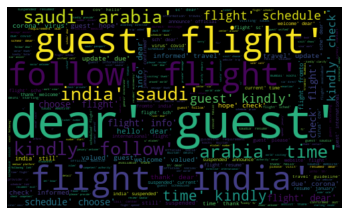

In [46]:

allWords = ''.join([str(twts) for twts in saudia_airlines_en['Tweet_nonstop']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Removing columns because we need only the last process from cleaning the data

In [47]:
saudia_airlines_en = saudia_airlines_en.drop(['Tweet_tokenized', 'Tweet_lemmatized', 'Tweet_stemmed'], axis=1)

#Save the data set

In [48]:
saudia_airlines_en.to_csv('saudia_airlines_en.csv')
!cp saudia_airlines_en.csv "./gdrive/My Drive/datasets/twitter_analysis/"

#Clean the flynas